## Importing libraries

In [1]:
%pip install powerlaw

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw
from scipy.stats import lognorm

Note: you may need to restart the kernel to use updated packages.


## Loading the dataset

In [2]:
df = pd.read_csv('All Tech Sub Domain All years .csv')
df.head(10)

,Innovation_Timeline_(Tech_Sub_Domain_-_Publication_Date),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,COMPUTER TECHNOLOGY,64.0,53.0,45.0,26.0,10.0,24.0,21.0,55.0,23.0,...,9982.0,4351.0,3648.0,4879.0,6220.0,10339.0,9175.0,19307.0,31892.0,7179.0
1,DIGITAL COMMUNICATION,18.0,13.0,12.0,5.0,1.0,2.0,1.0,6.0,14.0,...,9702.0,4732.0,3951.0,6314.0,8316.0,10830.0,10706.0,20421.0,28736.0,6806.0
2,PHARMACEUTICALS,83.0,64.0,79.0,49.0,121.0,46.0,58.0,147.0,84.0,...,8636.0,3937.0,3099.0,4061.0,4583.0,7176.0,6815.0,10993.0,15671.0,3097.0
3,ORGANIC FINE CHEMISTRY,244.0,195.0,271.0,127.0,237.0,126.0,121.0,301.0,184.0,...,8578.0,3922.0,2794.0,3531.0,3915.0,6097.0,4573.0,6560.0,8384.0,1462.0
4,MEDICAL TECHNOLOGY,63.0,62.0,79.0,59.0,65.0,43.0,38.0,93.0,113.0,...,6708.0,3175.0,2696.0,3487.0,4756.0,7851.0,6804.0,13024.0,20849.0,3886.0
5,APPARATUS,243.0,209.0,151.0,91.0,111.0,143.0,78.0,169.0,150.0,...,7450.0,3397.0,2529.0,3662.0,5101.0,8601.0,6854.0,12949.0,17052.0,3277.0
6,ELECTRICAL MACHINERY,243.0,209.0,151.0,91.0,111.0,143.0,78.0,169.0,150.0,...,7450.0,3397.0,2529.0,3662.0,5101.0,8601.0,6854.0,12949.0,17052.0,3277.0
7,ENERGY,243.0,209.0,151.0,91.0,111.0,143.0,78.0,169.0,150.0,...,7450.0,3397.0,2529.0,3662.0,5101.0,8601.0,6854.0,12949.0,17052.0,3277.0
8,TRANSPORT,120.0,113.0,106.0,43.0,40.0,44.0,34.0,73.0,51.0,...,4580.0,2619.0,2204.0,2842.0,3776.0,6058.0,4701.0,10272.0,13465.0,2225.0
9,TELECOMMUNICATIONS,46.0,46.0,39.0,21.0,23.0,20.0,22.0,26.0,33.0,...,6180.0,1953.0,1606.0,2291.0,2660.0,5083.0,4410.0,7279.0,10833.0,2066.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 37 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Innovation_Timeline_(Tech_Sub_Domain_-_Publication_Date)  44 non-null     object 
 1   1990                                                      41 non-null     float64
 2   1991                                                      41 non-null     float64
 3   1992                                                      41 non-null     float64
 4   1993                                                      41 non-null     float64
 5   1994                                                      41 non-null     float64
 6   1995                                                      41 non-null     float64
 7   1996                                                      41 non-null     float64
 8   1997                  

In [4]:
df.isnull()

,Innovation_Timeline_(Tech_Sub_Domain_-_Publication_Date),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Replace NaN values with zero
df.fillna(0, inplace=True)
df.isnull()

,Innovation_Timeline_(Tech_Sub_Domain_-_Publication_Date),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Display

In [7]:
print(f"Total number of patents considered: {len(df)}")

Total number of patents considered: 44


### Emperical distribution

In [9]:
# Calculate the total citations across all years for each domain
df['Total'] = df.iloc[:, 1:].sum(axis=1)

# Calculate the cumulative distribution
df['Cumulative Distribution'] = df['Total'].cumsum() / df['Total'].sum()

# Display the updated dataset
df[['Innovation_Timeline_(Tech_Sub_Domain_-_Publication_Date)', 'Total', 'Cumulative Distribution']].head()

,Innovation_Timeline_(Tech_Sub_Domain_-_Publication_Date),Total,Cumulative Distribution
0,COMPUTER TECHNOLOGY,278058.060055,0.060054
1,DIGITAL COMMUNICATION,272484.118905,0.118905
2,PHARMACEUTICALS,240746.170901,0.170900
3,ORGANIC FINE CHEMISTRY,204810.215136,0.215135
4,MEDICAL TECHNOLOGY,198278.257960,0.257958


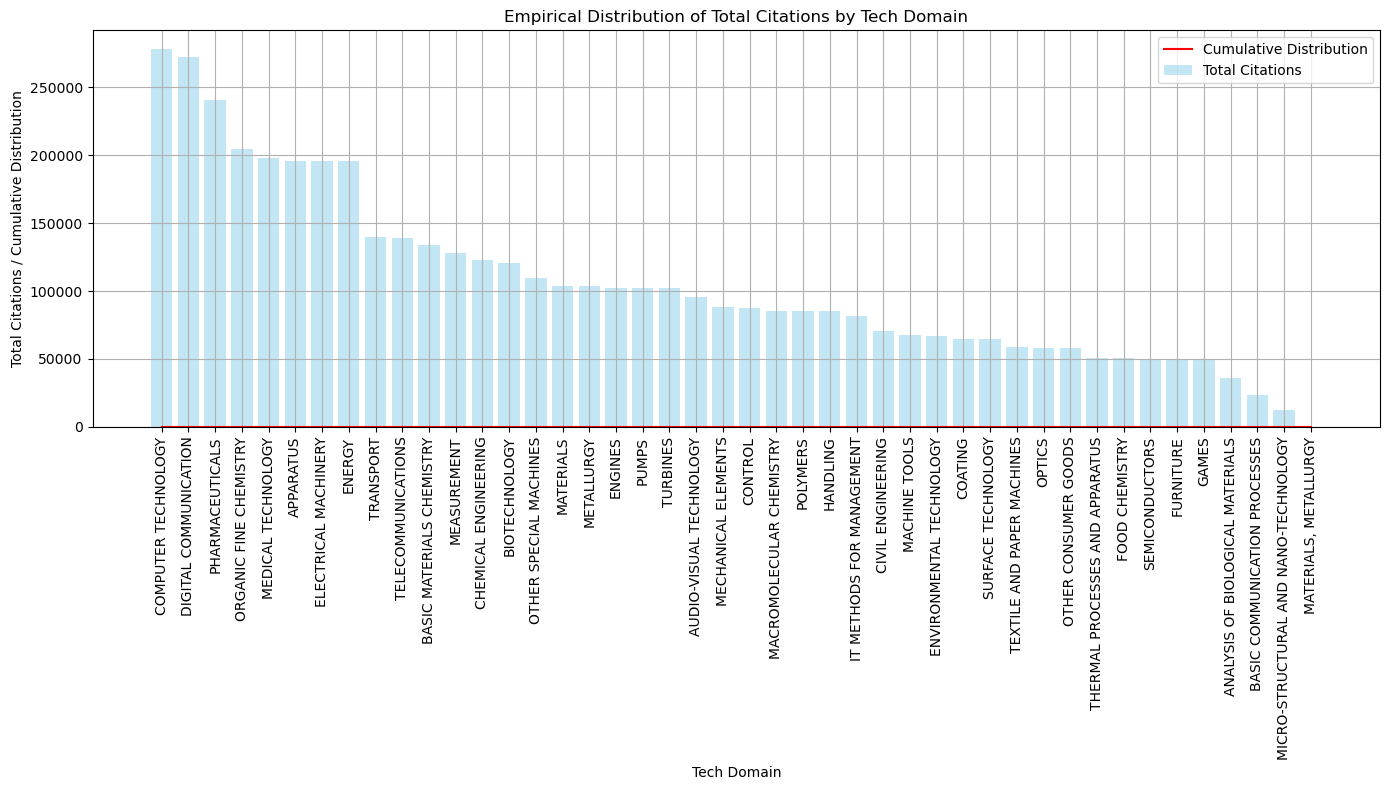

In [12]:
# Plot the empirical distributions for the tech domains
plt.figure(figsize=(14, 8))

# Bar plot for Total citations
plt.bar(df['Innovation_Timeline_(Tech_Sub_Domain_-_Publication_Date)'], 
        df['Total'], alpha=0.5, label='Total Citations', color='skyblue')

# Line plot for Cumulative Distribution
plt.plot(df['Innovation_Timeline_(Tech_Sub_Domain_-_Publication_Date)'], 
         df['Cumulative Distribution'], 'r-', label='Cumulative Distribution')

# Add labels, title, and legend
plt.xlabel('Tech Domain')
plt.ylabel('Total Citations / Cumulative Distribution')
plt.title('Empirical Distribution of Total Citations by Tech Domain')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

### Lognormal fit

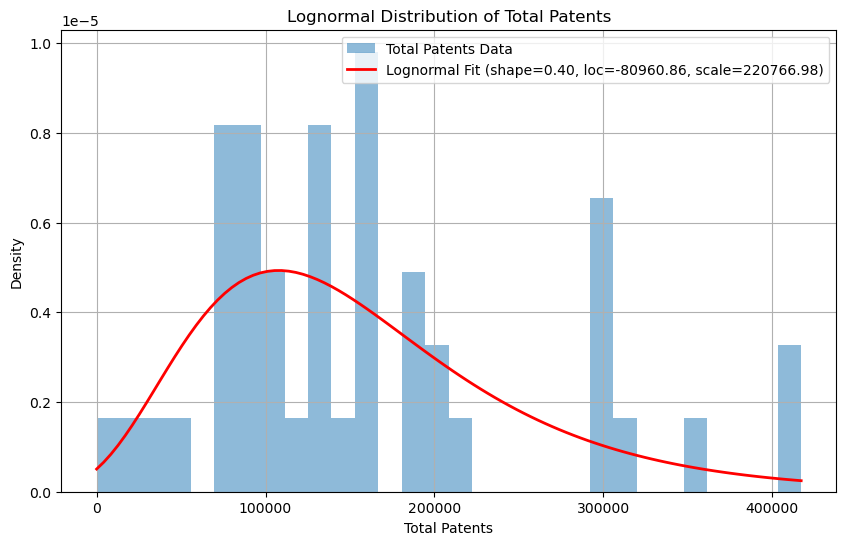

In [13]:
# Calculate the total patents per year for each company
df['Total'] = df.iloc[:, 1:].sum(axis=1)

# Fit a lognormal distribution to the total patents
total_patents = df['Total']
shape, loc, scale = lognorm.fit(total_patents)
x = np.linspace(min(total_patents), max(total_patents), 100)
pdf_fitted = lognorm.pdf(x, shape, loc, scale)

# Plot the lognormal distribution
plt.figure(figsize=(10, 6))
plt.hist(total_patents, bins=30, density=True, alpha=0.5, label='Total Patents Data')
plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'Lognormal Fit (shape={shape:.2f}, loc={loc:.2f}, scale={scale:.2f})')
plt.xlabel('Total Patents')
plt.ylabel('Density')
plt.title('Lognormal Distribution of Total Patents')
plt.legend()
plt.grid(True)
plt.show()

### Power law fit

Calculating best minimal value for power law fit


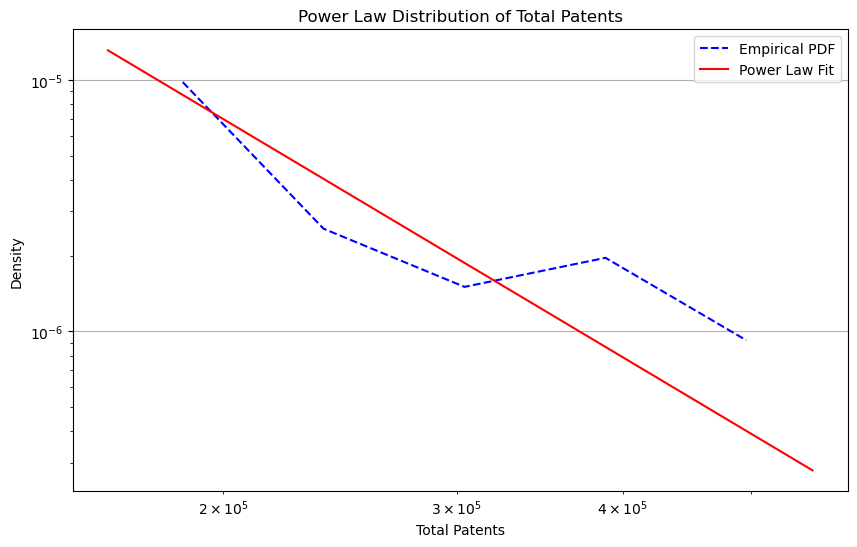

In [14]:
df['Total'] = df.iloc[:, 1:].sum(axis=1)
total_patents = df['Total']

# Fit a power law distribution to the total patents
fit = powerlaw.Fit(total_patents)

# Plot the power law distribution
plt.figure(figsize=(10, 6))
fit.plot_pdf(color='b', linestyle='--', label='Empirical PDF')
fit.power_law.plot_pdf(color='r', label='Power Law Fit')
plt.xlabel('Total Patents')
plt.ylabel('Density')
plt.title('Power Law Distribution of Total Patents')
plt.legend()
plt.grid(True)
plt.show()

### Pareto distribution

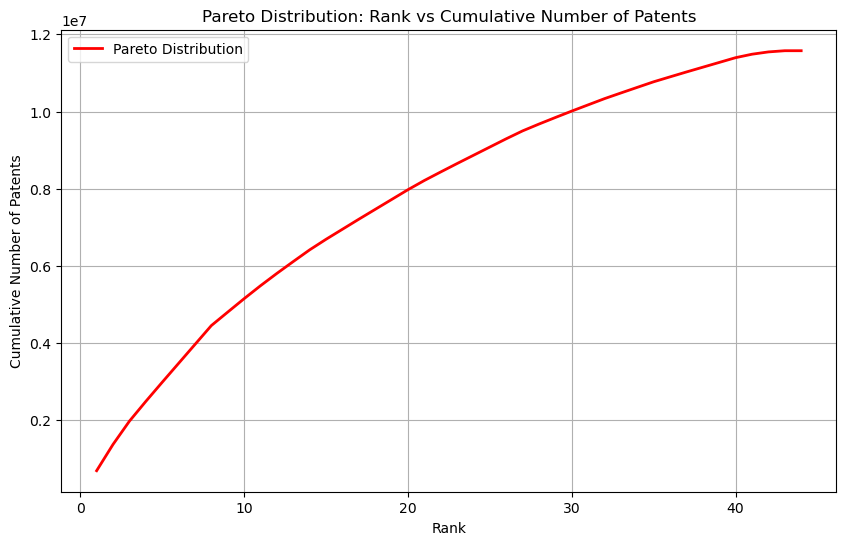

In [15]:
# Calculate the total patents across all years for each industry
df['Total'] = df.iloc[:, 1:].sum(axis=1)

# Sort industries by total patents in descending order
data_sorted = df.sort_values(by='Total', ascending=False)

# Calculate cumulative number of patents
data_sorted['Cumulative Patents'] = data_sorted['Total'].cumsum()

# Add rank column
data_sorted['Rank'] = np.arange(1, len(data_sorted) + 1)

# Pareto distribution: Rank vs Cumulative Patents
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['Rank'], data_sorted['Cumulative Patents'], 'r-', lw=2, label='Pareto Distribution')
plt.xlabel('Rank')
plt.ylabel('Cumulative Number of Patents')
plt.title('Pareto Distribution: Rank vs Cumulative Number of Patents')
plt.legend()
plt.grid(True)
plt.show()